In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("student_perf_mat_dummies.csv")

In [3]:
df

,Unnamed: 0,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,...,Walc_5,health_2,health_3,health_4,health_5,age,absences,G1,G2,G3
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,18,6,5,6,6
1,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,17,4,5,5,6
2,2,0,0,1,1,1,0,0,0,0,...,0,0,1,0,0,15,10,7,8,10
3,3,0,0,1,0,1,1,0,0,0,...,0,0,0,0,1,15,2,15,14,15
4,4,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,16,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,390,1,1,1,1,0,0,0,1,0,...,1,0,0,1,0,20,11,9,9,9
391,391,1,1,1,1,1,0,0,1,0,...,0,1,0,0,0,17,3,14,16,16
392,392,1,1,0,0,1,0,1,0,0,...,0,0,1,0,0,21,3,10,8,7
393,393,1,1,0,1,1,0,0,1,0,...,0,0,0,0,1,18,0,11,12,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 75 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         395 non-null    int64 
 1   school_MS          395 non-null    int64 
 2   sex_M              395 non-null    int64 
 3   address_U          395 non-null    int64 
 4   famsize_LE3        395 non-null    int64 
 5   Pstatus_T          395 non-null    int64 
 6   Mjob_health        395 non-null    int64 
 7   Mjob_other         395 non-null    int64 
 8   Mjob_services      395 non-null    int64 
 9   Mjob_teacher       395 non-null    int64 
 10  Fjob_health        395 non-null    int64 
 11  Fjob_other         395 non-null    int64 
 12  Fjob_services      395 non-null    int64 
 13  Fjob_teacher       395 non-null    int64 
 14  reason_home        395 non-null    int64 
 15  reason_other       395 non-null    int64 
 16  reason_reputation  395 non-null    int64 
 1

In [5]:
X = df.drop(["G3", "Unnamed: 0", "results_pass", "results"], axis=1)
y = df["G3"]

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
scaler = StandardScaler()

In [9]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

In [11]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [12]:
from sklearn.svm import LinearSVR
lin_svr = LinearSVR(max_iter=10000)
lin_svr.fit(X_train, y_train)

LinearSVR(max_iter=10000)

In [13]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [14]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [15]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [17]:
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor()
ab.fit(X_train, y_train)

AdaBoostRegressor()

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
def report(model):
    preds = model.predict(X_test)
    print(f"MAE: {mean_absolute_error(y_test,preds)}")
    print(f"MSE: {mean_squared_error(y_test,preds)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test,preds))}")


In [20]:
print("Linear Model")
report(lin)

Linear Model
MAE: 1.4162425960836884
MSE: 3.636957061146888
RMSE: 1.9070807694345009


In [21]:
print("Log Model")
report(log)

Log Model
MAE: 2.436974789915966
MSE: 10.655462184873949
RMSE: 3.2642705440686055


In [22]:
print("Linear_svr Model")
report(lin_svr)

Linear_svr Model
MAE: 1.0358815027144561
MSE: 2.7803048620831285
RMSE: 1.6674246196104723


In [23]:
print("SVR Model")
report(svr)

SVR Model
MAE: 2.1402298171762184
MSE: 8.885338014653355
RMSE: 2.980828410803506


In [24]:
print("Decision Tree Model")
report(dt)

Decision Tree Model
MAE: 1.134453781512605
MSE: 4.647058823529412
RMSE: 2.155703788448082


In [25]:
print("Random Forest Model")
report(rf)

Random Forest Model
MAE: 0.8904201680672269
MSE: 1.9161596638655465
RMSE: 1.3842541904814833


In [26]:
print("Gradient Boosting Model")
report(gb)

Gradient Boosting Model
MAE: 0.9841577945189216
MSE: 2.172019494168728
RMSE: 1.473777287845327


In [27]:
print("Ada Boost Model")
report(ab)

Ada Boost Model
MAE: 1.1539826597668825
MSE: 2.753170192937869
RMSE: 1.65926796899653


In [28]:
test_predictions = rf.predict(X_test)

In [29]:
test_res = y_test - test_predictions

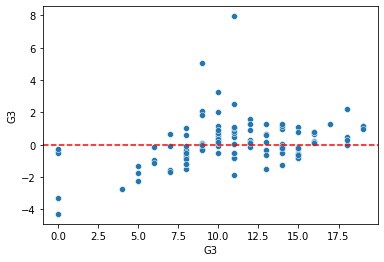

In [30]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

In [31]:
import scipy as sp

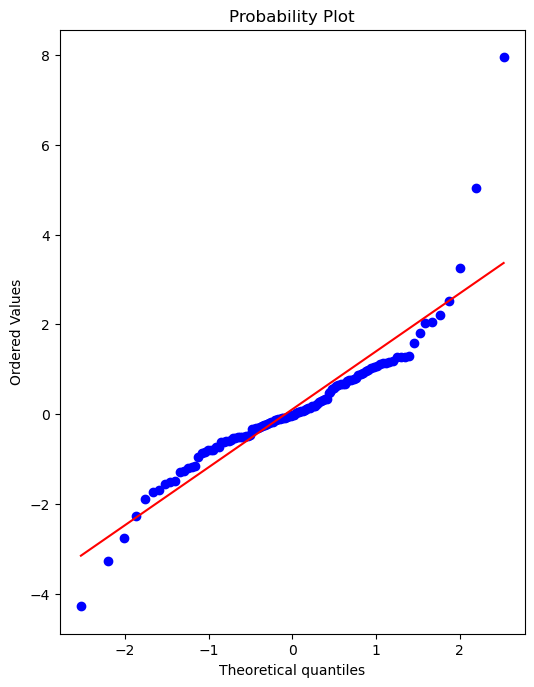

In [32]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_res,plot=ax)

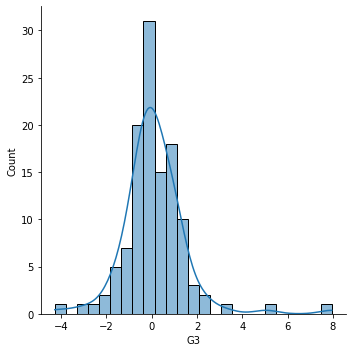

In [33]:
sns.displot(test_res,bins=25,kde=True)

In [35]:
test_predictions = gb.predict(X_test)

In [36]:
test_res = y_test - test_predictions

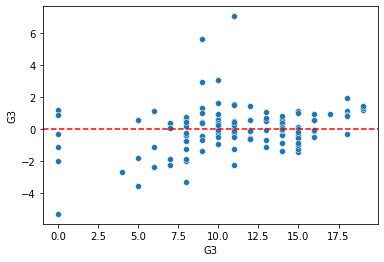

In [37]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

In [38]:
import scipy as sp

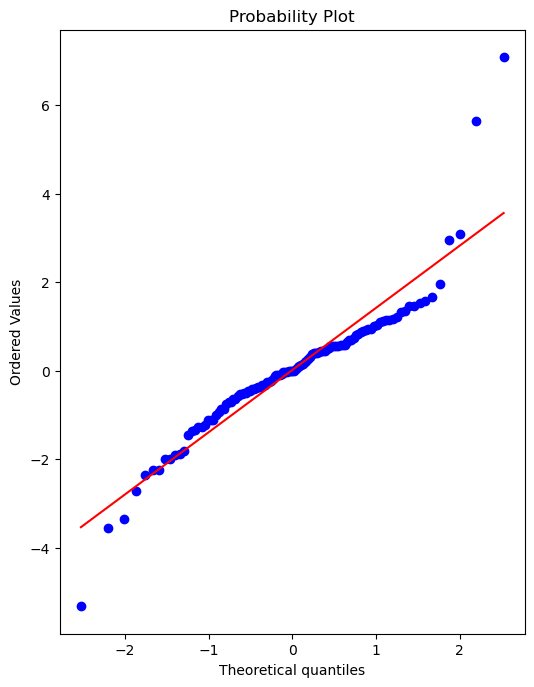

In [39]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_res,plot=ax)

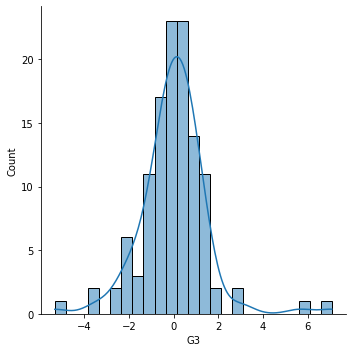

In [40]:
sns.displot(test_res,bins=25,kde=True)